In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from datasets import load_dataset
dataset = load_dataset('lukebarousse/data_jobs')
df =dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x)  if pd.notna(x) else x)

In [3]:
job_titles =['Data Analyst','Data Engineer','Data Scientist']
df_us = df[(df['job_country'] == 'United States') & (df['job_title_short'].isin(job_titles))]

In [ ]:
df_us

In [23]:
df_us1 = df_us.explode('job_skills')

In [ ]:
df_us1

In [25]:
df_us1 = df_us1.groupby(['job_title_short','job_skills']).size().reset_index(name='count')

In [26]:
df_us1

,job_title_short,job_skills,count
0,Data Analyst,airflow,387
1,Data Analyst,airtable,36
2,Data Analyst,alteryx,2045
3,Data Analyst,angular,129
4,Data Analyst,ansible,48
...,...,...,...
662,Data Scientist,workfront,2
663,Data Scientist,wrike,1
664,Data Scientist,xamarin,3
665,Data Scientist,yarn,119


In [27]:
df_us1.sort_values(by ='count',ascending =False ,inplace=True)

In [28]:
df_us1

,job_title_short,job_skills,count
589,Data Scientist,python,42379
175,Data Analyst,sql,34452
624,Data Scientist,sql,30034
54,Data Analyst,excel,27519
593,Data Scientist,r,26022
...,...,...,...
91,Data Analyst,kotlin,1
614,Data Scientist,shogun,1
81,Data Analyst,ionic,1
22,Data Analyst,capacitor,1


In [31]:
df_us_p = df_us['job_title_short'].value_counts().reset_index(name='job_total')

In [32]:
df_us_p

,job_title_short,job_total
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080


In [34]:
df_f =pd.merge(df_us1,df_us_p,how ='inner',on='job_title_short')

In [35]:
df_f

,job_title_short,job_skills,count,job_total
0,Data Scientist,python,42379,58830
1,Data Analyst,sql,34452,67816
2,Data Scientist,sql,30034,58830
3,Data Analyst,excel,27519,67816
4,Data Scientist,r,26022,58830
...,...,...,...,...
662,Data Analyst,kotlin,1,67816
663,Data Scientist,shogun,1,58830
664,Data Analyst,ionic,1,67816
665,Data Analyst,capacitor,1,67816


In [36]:
df_f['percentage'] = 100 * df_f['count']/df_f['job_total']

In [37]:
df_f

,job_title_short,job_skills,count,job_total,percentage
0,Data Scientist,python,42379,58830,72.036376
1,Data Analyst,sql,34452,67816,50.802171
2,Data Scientist,sql,30034,58830,51.052184
3,Data Analyst,excel,27519,67816,40.578919
4,Data Scientist,r,26022,58830,44.232534
...,...,...,...,...,...
662,Data Analyst,kotlin,1,67816,0.001475
663,Data Scientist,shogun,1,58830,0.001700
664,Data Analyst,ionic,1,67816,0.001475
665,Data Analyst,capacitor,1,67816,0.001475


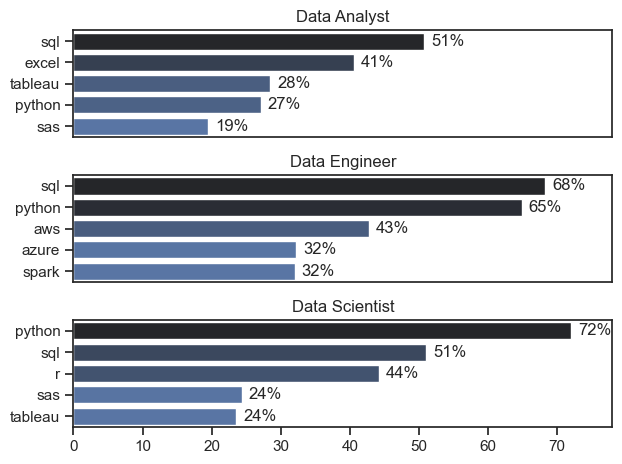

In [55]:
fig ,ax =plt.subplots(len(job_titles),1)
sns.set_theme(style ='ticks')
for i,n in enumerate(job_titles):
    df_ff = df_f[df_f['job_title_short']==n].head(5)
    sns.barplot(data = df_ff,x='percentage',y='job_skills',hue='count',palette='dark:b_r',ax=ax[i],)
    ax[i].set_title(n)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].set_xlim(0,78)
    ax[i].legend().set_visible(False)
    for n,v in enumerate(df_ff['percentage']):
        ax[i].text(v+1,n, f'{v:.0f}%',va='center')
    
    if i!=len(job_titles)-1:
     ax[i].set_xticks([])

fig.tight_layout()